# Task 2

Author: Rohan Kudtarkar

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [18]:
data =pd.read_csv("iris.csv")
data.head(4)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


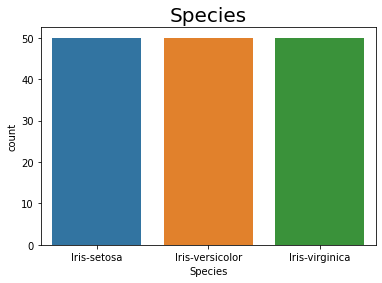

In [6]:
sns.countplot(x='Species',data=data)
plt.title('Species',fontsize=20)
plt.show()

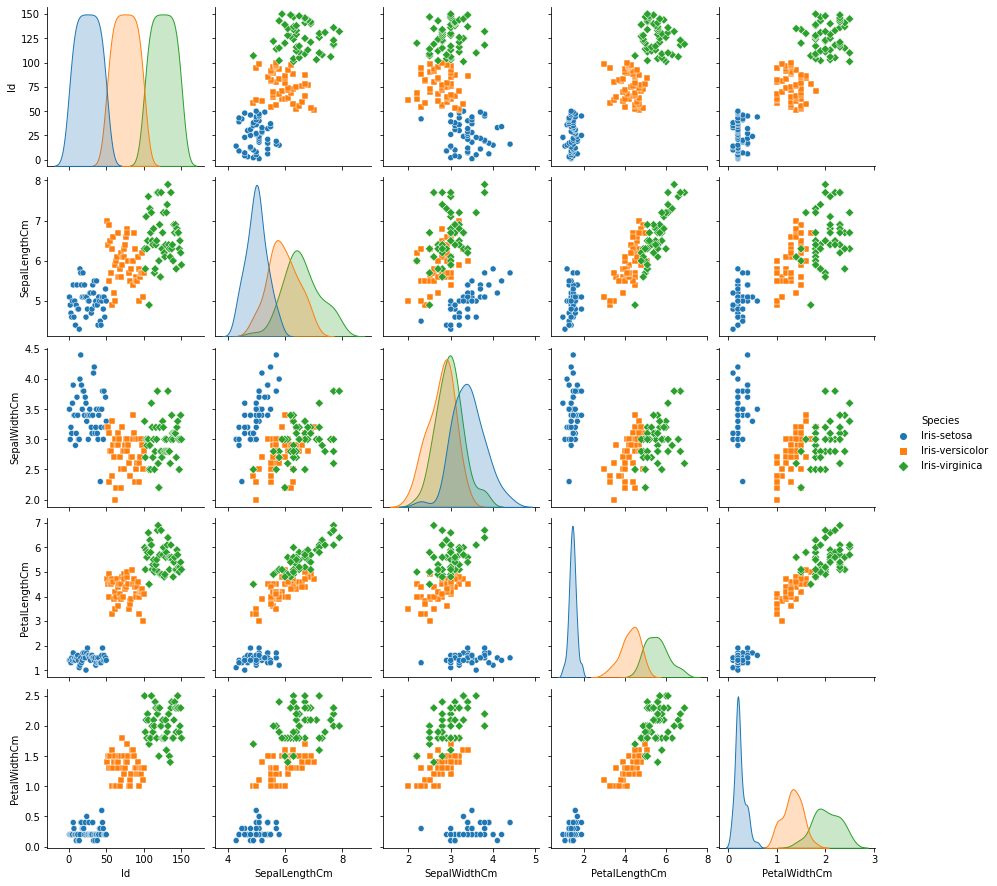

In [7]:
sns.pairplot(data,hue='Species',markers=['o','s','D'])

In [8]:
x=data.iloc[:,2:4].values

Elbow method to calculate optimum value of k

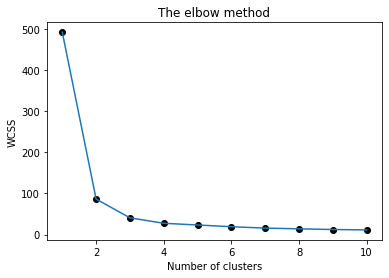

In [9]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.scatter(range(1,11),wcss,c='black')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Implement K-means with k=5

In [10]:
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state=0)
y_pred = kmean.fit_predict(x)

In [11]:
y_pred

array([0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 4, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1])

In [12]:
#Let's compare the values
text = x[:,0]
text = text.reshape(150,1)
compare = np.append(arr = y_pred.reshape(150,1),values=text,axis=1)
print(compare)

[[0.  3.5]
 [0.  3. ]
 [0.  3.2]
 [0.  3.1]
 [4.  3.6]
 [4.  3.9]
 [0.  3.4]
 [0.  3.4]
 [0.  2.9]
 [0.  3.1]
 [4.  3.7]
 [0.  3.4]
 [0.  3. ]
 [0.  3. ]
 [4.  4. ]
 [4.  4.4]
 [4.  3.9]
 [0.  3.5]
 [4.  3.8]
 [4.  3.8]
 [0.  3.4]
 [4.  3.7]
 [4.  3.6]
 [0.  3.3]
 [0.  3.4]
 [0.  3. ]
 [0.  3.4]
 [0.  3.5]
 [0.  3.4]
 [0.  3.2]
 [0.  3.1]
 [0.  3.4]
 [4.  4.1]
 [4.  4.2]
 [0.  3.1]
 [0.  3.2]
 [0.  3.5]
 [0.  3.1]
 [0.  3. ]
 [0.  3.4]
 [0.  3.5]
 [0.  2.3]
 [0.  3.2]
 [0.  3.5]
 [4.  3.8]
 [0.  3. ]
 [4.  3.8]
 [0.  3.2]
 [4.  3.7]
 [0.  3.3]
 [1.  3.2]
 [1.  3.2]
 [1.  3.1]
 [3.  2.3]
 [1.  2.8]
 [1.  2.8]
 [1.  3.3]
 [3.  2.4]
 [1.  2.9]
 [3.  2.7]
 [3.  2. ]
 [3.  3. ]
 [3.  2.2]
 [1.  2.9]
 [3.  2.9]
 [1.  3.1]
 [1.  3. ]
 [3.  2.7]
 [1.  2.2]
 [3.  2.5]
 [1.  3.2]
 [3.  2.8]
 [1.  2.5]
 [1.  2.8]
 [1.  2.9]
 [1.  3. ]
 [1.  2.8]
 [1.  3. ]
 [1.  2.9]
 [3.  2.6]
 [3.  2.4]
 [3.  2.4]
 [3.  2.7]
 [1.  2.7]
 [1.  3. ]
 [1.  3.4]
 [1.  3.1]
 [3.  2.3]
 [3.  3. ]
 [3.  2.5]
 [1.  2.6]

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visualising the clusters - On the first two columns

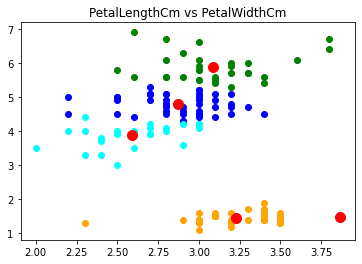

In [14]:
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1],c='orange',label='cluster1')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1],c='blue',label='cluster2')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1],c='green',label='cluster3')
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1],c='cyan',label='cluster4')

plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],s=100,c='Red')
plt.title('PetalLengthCm vs PetalWidthCm')
plt.show()

Using Dendogram to find the optimal number of clusters

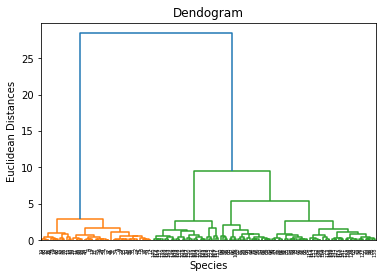

In [15]:
# Hierarchical Clustering
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram')
plt.xlabel('Species')
plt.ylabel('Euclidean Distances')
plt.show()

Training the hierarchical clustering model

In [16]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

Visualising the Clusters

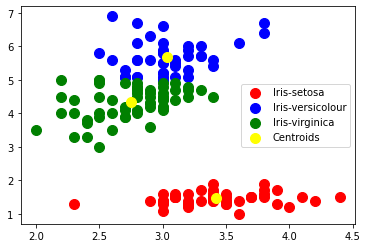

In [17]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

Conclusion :

From the above visualization we conclude, Iris-setosa has higher sepal length but lower sepal width. However, the Iris-versicolour and Iris-verginica has higher sepal width but lower sepal length than Iris-setosa.